In [1]:
from fastai.vision.all import *
import timm

/home/average-joe/mambaforge/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
path = Path('/home/average-joe/coding_data/birds/birds')

In [6]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=128),
)

In [7]:
dls = db.dataloaders(path, bs = 16)

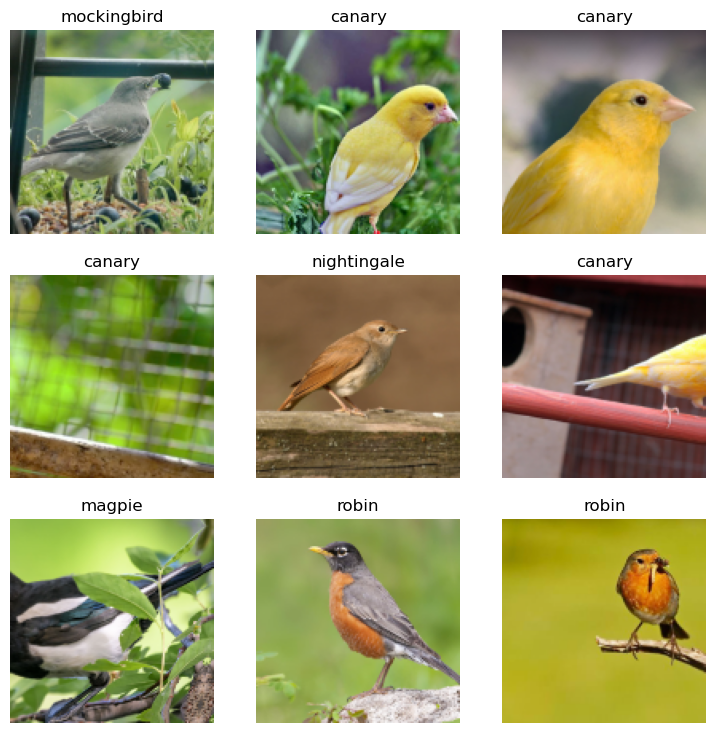

In [8]:
b = dls.one_batch()
dls.show_batch(b=b)

In [9]:
learn = vision_learner(dls, 'convnext_base_in22ft1k', metrics=[accuracy, error_rate])

In [10]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.409864,0.039768,0.994764,0.005236,00:08


/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.053126,0.036477,0.989529,0.010471,00:12
1,0.054060,0.020605,0.984293,0.015707,00:12
2,0.030502,0.023554,0.994764,0.005236,00:12
3,0.025780,0.014708,0.989529,0.010471,00:12
4,0.038699,0.019190,0.989529,0.010471,00:12


/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3

In [20]:
learn.export('bird_classifier_convnext_base_989.pkl')

In [11]:
#from fastai.vision.widgets import *
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [12]:
#print(cleaner.delete())
#print(cleaner.change())
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], path/cat))

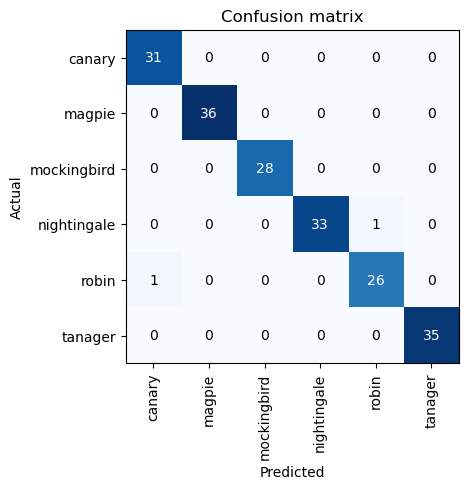

In [17]:
interpr = ClassificationInterpretation.from_learner(learn)
interpr.plot_confusion_matrix()

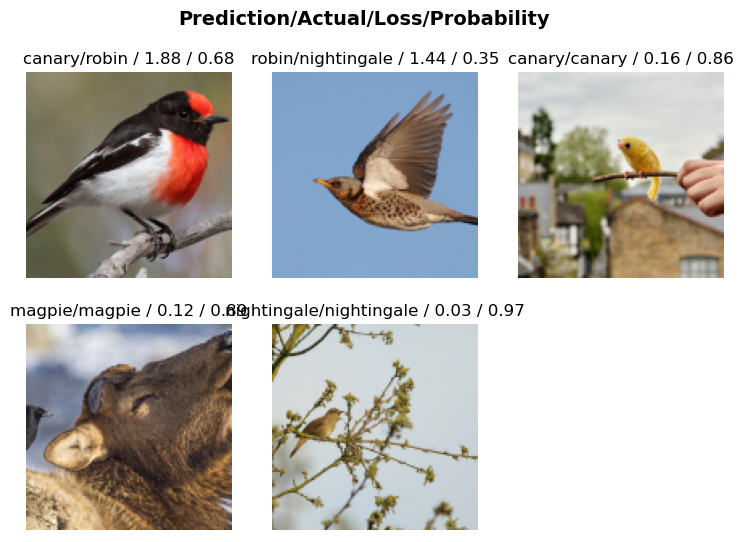

In [19]:
interpr.plot_top_losses(k=5)